In [ ]:
!pip install --upgrade yfinance


Import libraries

In [ ]:
import yfinance as yf
from pprint import pprint

Download ticker history OHLCV

In [ ]:
TICKER = "SPY"

ticker = yf.Ticker(TICKER)
appl_data = ticker.history(period="30d")
appl_data = appl_data.reset_index(drop=True)

print(appl_data.head(3))

         Open        High         Low       Close     Volume  Dividends  \
0  410.823952  414.320941  409.120289  413.693298   87287000        0.0   
1  413.364505  418.116871  413.135376  417.678497   97177200        0.0   
2  418.615022  419.162974  415.805451  417.070740  103679700        0.0   

   Stock Splits  Capital Gains  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  


Download ticker history Option chain data

In [ ]:
ticker = yf.Ticker(TICKER)

all_data = []

all_options_data = ticker.options

for k, option in enumerate(all_options_data): # all the expirations dates
    option_data = ticker.option_chain(option)
    print(k) #,option_data.calls.columns)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [ ]:
option_expiration_date = '2023-07-21'

In [ ]:
option_data = ticker.option_chain(option_expiration_date)
option_data

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0    SPY230721C00150000 2023-06-28 20:08:17+00:00   150.0     287.35  287.46   
1    SPY230721C00155000 2023-06-28 20:11:37+00:00   155.0     282.21  282.48   
2    SPY230721C00160000 2023-06-26 13:30:08+00:00   160.0     273.28  277.45   
3    SPY230721C00165000 2023-03-28 19:23:14+00:00   165.0     231.66  248.09   
4    SPY230721C00170000 2023-06-28 20:04:18+00:00   170.0     267.27  267.54   
..                  ...                       ...     ...        ...     ...   
171  SPY230721C00630000 2023-03-08 14:35:50+00:00   630.0       0.01    0.00   
172  SPY230721C00635000 2023-03-20 13:30:06+00:00   635.0       0.01    0.00   
173  SPY230721C00640000 2023-02-21 16:02:15+00:00   640.0       0.01    0.00   
174  SPY230721C00645000 2023-02-23 14:30:04+00:00   645.0       0.01    0.00   
175  SPY230721C00650000 2023-06-26 13:36:38+00:00   650.0       0.01    0.00   

        ask  change  perc

In [ ]:
option_data.puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY230721P00150000,2023-06-15 14:37:29+00:00,150.0,0.01,0.0,0.01,0.0,0.0,43.0,32621,1.218754,False,REGULAR,USD
1,SPY230721P00155000,2023-06-13 19:52:19+00:00,155.0,0.01,0.0,0.01,0.0,0.0,2.0,8762,1.187504,False,REGULAR,USD
2,SPY230721P00160000,2023-06-09 13:58:40+00:00,160.0,0.01,0.0,0.01,0.0,0.0,315.0,4849,1.156254,False,REGULAR,USD
3,SPY230721P00165000,2023-06-12 20:01:02+00:00,165.0,0.01,0.0,0.01,0.0,0.0,1245.0,7042,1.125004,False,REGULAR,USD
4,SPY230721P00170000,2023-06-14 14:35:48+00:00,170.0,0.01,0.0,0.01,0.0,0.0,5.0,5798,1.093755,False,REGULAR,USD


(175.23499755859376, 788.5574890136719)

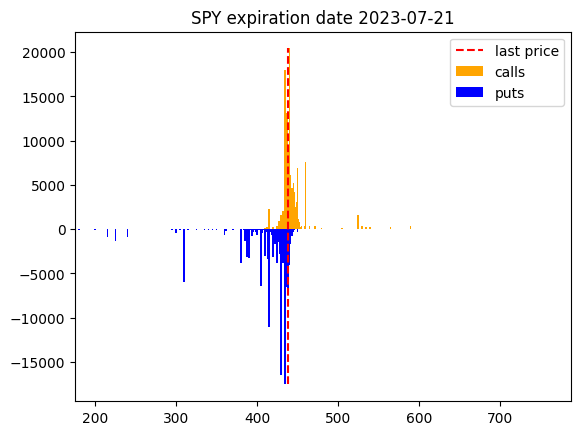

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
from pprint import pprint

plt.title( f"{TICKER} expiration date {option_expiration_date}" )

plt.bar( option_data.calls['strike'] , option_data.calls['volume'] , width = 2 , align = 'center' , color = 'orange' )
plt.bar( option_data.puts['strike'] , -option_data.puts['volume'] , width = 2 , align = 'center' , color = 'blue' )

plt.vlines( x = appl_data['Close'].iloc[-1],
           ymin = min(-option_data.puts['volume']) ,
           ymax = max(option_data.calls['volume']) ,
           linestyles = '--',
           colors = 'red' )

plt.legend( [ 'last price' , 'calls' , 'puts' ] )
plt.xlim([appl_data['Close'].iloc[-1]*0.4, appl_data['Close'].iloc[-1]*1.8])


(175.23499755859376, 657.1312408447266)

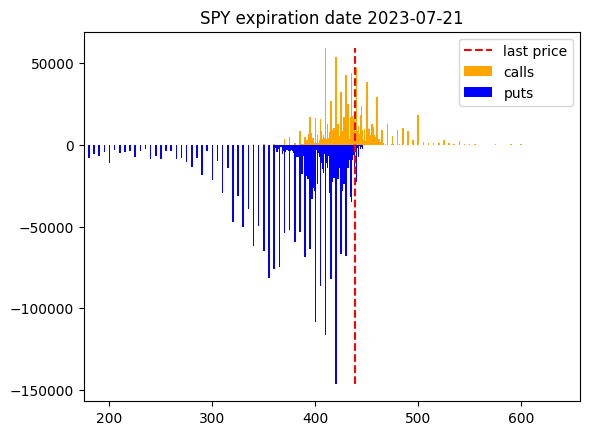

In [ ]:
plt.title(f"{TICKER} expiration date {option_expiration_date}")

plt.bar(option_data.calls['strike'], option_data.calls['openInterest'],width=1.5,align='center',color='orange')
plt.bar(option_data.puts['strike'], -option_data.puts['openInterest'],width=1.5,align='center',color='blue')

plt.vlines( x = appl_data['Close'].iloc[-1],ymin=min(-option_data.puts['openInterest']) ,
            ymax=max(option_data.calls['openInterest']) ,
            linestyles='--',
            colors='red')

plt.legend( [ 'last price' , 'calls' , 'puts' ] )

plt.xlim([appl_data['Close'].iloc[-1]*0.4, appl_data['Close'].iloc[-1]*1.5])

In [ ]:
import yfinance as yf

aapl = yf.Ticker(TICKER)
expiration_date = aapl.options[0]
options_chain = aapl.option_chain(expiration_date)
options_chain

#options_chain.calls.to_csv("aapl_calls.csv")
#options_chain.puts.to_csv("aapl_puts.csv")

Options(calls=        contractSymbol             lastTradeDate  strike  lastPrice    bid  \
0   SPY230629C00380000 2023-06-29 18:35:44+00:00   380.0      57.30  57.27   
1   SPY230629C00390000 2023-06-29 17:46:19+00:00   390.0      47.39  47.26   
2   SPY230629C00400000 2023-06-29 18:39:00+00:00   400.0      37.33  37.24   
3   SPY230629C00410000 2023-06-28 18:58:59+00:00   410.0      25.59  27.30   
4   SPY230629C00420000 2023-06-29 19:38:11+00:00   420.0      17.50  17.19   
5   SPY230629C00424000 2023-06-29 19:30:25+00:00   424.0      13.63  13.28   
6   SPY230629C00426000 2023-06-29 19:35:54+00:00   426.0      11.61  11.31   
7   SPY230629C00428000 2023-06-29 19:31:02+00:00   428.0       9.65   9.20   
8   SPY230629C00429000 2023-06-29 19:42:17+00:00   429.0       8.41   8.30   
9   SPY230629C00430000 2023-06-29 19:42:00+00:00   430.0       7.40   7.29   
10  SPY230629C00431000 2023-06-29 19:30:23+00:00   431.0       6.60   6.33   
11  SPY230629C00432000 2023-06-29 19:40:14+00:00  

/tmp/ipykernel_120586/1868594740.py:10: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
/tmp/ipykernel_120586/1868594740.py:11: RuntimeWarning: invalid value encountered in sqrt
  gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
/tmp/ipykernel_120586/1868594740.py:10: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
/tmp/ipykernel_120586/1868594740.py:11: RuntimeWarning: invalid value encountered in sqrt
  gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))


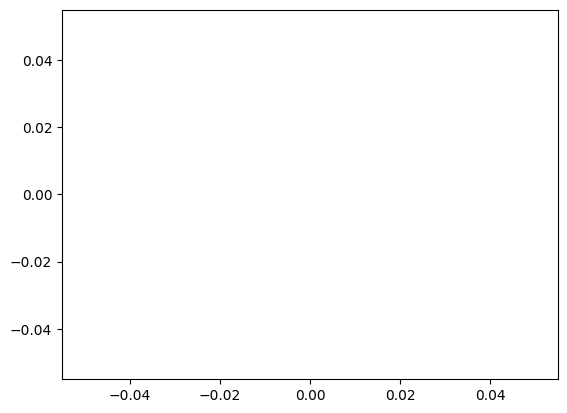

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm
import datetime
import matplotlib.pyplot as plt


def bs_gamma(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

aapl = yf.Ticker(TICKER)
EXPIRATION_DATE = option_expiration_date
opt = aapl.option_chain(EXPIRATION_DATE)

df = pd.DataFrame(opt.calls)
specific_date = datetime.date(2023, 6, 2)
today = datetime.date.today()
difference = specific_date - today
df['Gamma'] = bs_gamma(df['lastPrice'], df['strike'], difference.days / 365, 0.01, df['impliedVolatility'])
df['level_call'] = df['Gamma'] * df['openInterest']

df2 = pd.DataFrame(opt.puts)
specific_date = datetime.date(2023, 6, 2)
today = datetime.date.today()
difference = specific_date - today
df2['Gamma'] = bs_gamma(df2['lastPrice'], df2['strike'], difference.days / 365, 0.01, df2['impliedVolatility'])
df2['level_puts'] = df2['Gamma'] * df2['openInterest']


plt.plot(df['strike'],df["level_call"],color='green')
plt.plot(df2['strike'],df2["level_puts"],color='red')

<BarContainer object of 172 artists>

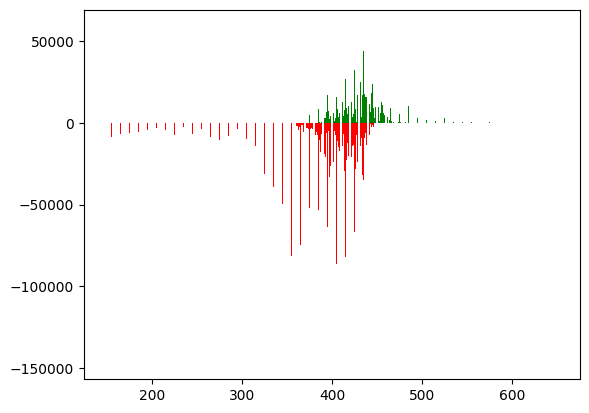

In [ ]:
plt.bar(df['strike'],df["openInterest"],color='green')
plt.bar(df2['strike'],-df2["openInterest"],color='red')

<BarContainer object of 172 artists>

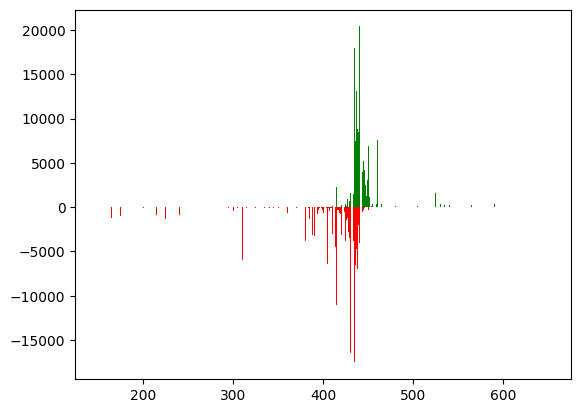

In [ ]:
plt.bar(df['strike'],df["volume"],color='green')
plt.bar(df2['strike'],-df2["volume"],color='red')

In [ ]:
import yfinance as yf
from scipy.stats import norm
import numpy as np

aapl = yf.Ticker("AAPL")
aapl_data = aapl.history(period="90d")
aapl_close = aapl_data['Close']


def black_scholes_call_gamma(S, K, T, r, sigma):
    """
    S is the stock price
    K is the strike price
    T is the time to expiration
    r is the risk-free interest rate
    Sigma is the volatility of the stock.
    """
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma


# sigma calculation
returns = aapl_data['Close'].pct_change()
sigma = np.sqrt(252) * np.std(returns)
z_score = norm.ppf(0.975)
call_sigma = z_score * sigma

# data calculation
stock_price = aapl_close[-1]
time_decay = 30 / 365
risk_free_rate = 0.01


df['gamma'] = None
df['GEX'] = None

df2['gamma'] = None
df2['GEX'] = None

for index, strike_price in df['strike'].items():
    call_gamma = black_scholes_call_gamma(S = stock_price, K = strike_price, T= time_decay, r = risk_free_rate, sigma = call_sigma)
    df.loc[index,'gamma'] = call_gamma
    df.loc[index,'GEX'] = call_gamma * df.loc[index,'openInterest']

for index, strike_price in df2['strike'].items():
    puts_gamma = black_scholes_call_gamma(S = stock_price, K = strike_price, T= time_decay, r = risk_free_rate, sigma = call_sigma)
    df2.loc[index,'gamma'] = puts_gamma
    df2.loc[index,'GEX'] = puts_gamma * df2.loc[index,'openInterest']

merged_df = pd.merge(df, df2, on='strike')


df.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Gamma,level_call,gamma,GEX
0,SPY230721C00150000,2023-06-28 20:08:17+00:00,150.0,287.35,287.46,288.06,0.0,0.0,8.0,16,0.000010,True,REGULAR,USD,NaN,NaN,0.001507,0.024119
1,SPY230721C00155000,2023-06-28 20:11:37+00:00,155.0,282.21,282.48,283.05,0.0,0.0,15.0,13,0.000010,True,REGULAR,USD,NaN,NaN,0.002906,0.037774
2,SPY230721C00160000,2023-06-26 13:30:08+00:00,160.0,273.28,277.45,278.04,0.0,0.0,6.0,8,0.000010,True,REGULAR,USD,NaN,NaN,0.005005,0.040041
3,SPY230721C00165000,2023-03-28 19:23:14+00:00,165.0,231.66,248.09,249.15,0.0,0.0,NaN,1,0.000010,True,REGULAR,USD,NaN,NaN,0.00778,0.00778
4,SPY230721C00170000,2023-06-28 20:04:18+00:00,170.0,267.27,267.54,268.10,0.0,0.0,2.0,2,1.156254,True,REGULAR,USD,NaN,NaN,0.011008,0.022015


In [ ]:
merged_df = pd.merge(df, df2, on='strike')
merged_df.head()

,contractSymbol_x,lastTradeDate_x,strike,lastPrice_x,bid_x,ask_x,change_x,percentChange_x,volume_x,openInterest_x,...,volume_y,openInterest_y,impliedVolatility_y,inTheMoney_y,contractSize_y,currency_y,Gamma_y,level_puts,gamma_y,GEX_y
0,SPY230721C00150000,2023-06-28 20:08:17+00:00,150.0,287.35,287.46,288.06,0.0,0.0,8.0,16,...,43.0,32621,1.218754,False,REGULAR,USD,NaN,NaN,0.001507,49.174941
1,SPY230721C00155000,2023-06-28 20:11:37+00:00,155.0,282.21,282.48,283.05,0.0,0.0,15.0,13,...,2.0,8762,1.187504,False,REGULAR,USD,NaN,NaN,0.002906,25.459403
2,SPY230721C00160000,2023-06-26 13:30:08+00:00,160.0,273.28,277.45,278.04,0.0,0.0,6.0,8,...,315.0,4849,1.156254,False,REGULAR,USD,NaN,NaN,0.005005,24.270124
3,SPY230721C00165000,2023-03-28 19:23:14+00:00,165.0,231.66,248.09,249.15,0.0,0.0,NaN,1,...,1245.0,7042,1.125004,False,REGULAR,USD,NaN,NaN,0.00778,54.787024
4,SPY230721C00170000,2023-06-28 20:04:18+00:00,170.0,267.27,267.54,268.10,0.0,0.0,2.0,2,...,5.0,5798,1.093755,False,REGULAR,USD,NaN,NaN,0.011008,63.822125


(306.66124572753904, 569.5137420654297)

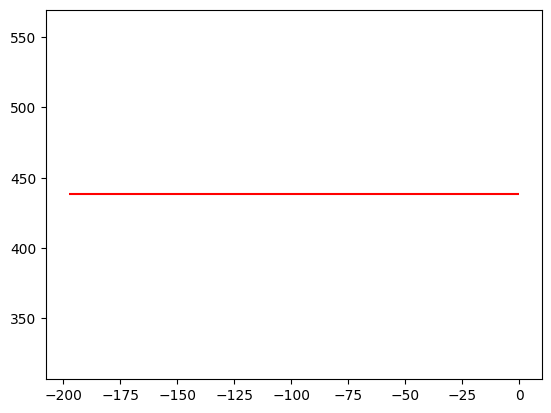

In [ ]:
plt.barh(merged_df['strike'], merged_df['GEX_x'])
plt.barh(merged_df['strike'], -merged_df['GEX_y'])

plt.hlines(appl_data['Close'].iloc[-1],xmin = min(-merged_df['GEX_y']), xmax = max(merged_df['GEX_x']),colors='red')
plt.ylim([appl_data['Close'].iloc[-1]*0.7, appl_data['Close'].iloc[-1]*1.3])

In [ ]:
merged_df['GEX'] = merged_df['GEX_x'] - merged_df['GEX_y']

In [ ]:
#plt.barh(merged_df['strike'], merged_df['GEX'] )
#plt.plot(aapl_data.index- len(aapl_data.index) , aapl_data['Close'],color='black')
#plt.hlines(appl_data['Close'].iloc[-1],xmin = min(-merged_df['GEX']), xmax = max(merged_df['GEX']),colors='red',linestyles='--')
#plt.ylim([appl_data['Close'].iloc[-1]*0.7, appl_data['Close'].iloc[-1]*1.3])
#plt.xlim([min(merged_df['GEX']),  max(merged_df['GEX'])])

In [ ]:
# fig, ax = plt.subplots()
# fig.set_figheight(15)
# fig.set_figwidth(15)

# ax.barh(merged_df['strike'], merged_df['GEX'] )
# ax.plot(aapl_data.index- len(aapl_data.index) , aapl_data['Close'],color='black')
# ax.hlines(appl_data['Close'].iloc[-1],xmin = min(-merged_df['GEX']), xmax = max(merged_df['GEX']),colors='red',linestyles='--')

# ax.set_title(f"{TICKER} expiration date {option_expiration_date}")

# ax.legend( [ 'GEX Levels','last price' ] )

# for i, value in enumerate(merged_df['strike']):
#     side = 'right'
#     if merged_df['GEX'].iloc[i]>0: side = 'left'
#     if merged_df['GEX'].iloc[i]>0.5 or merged_df['GEX'].iloc[i]< -0.5:
#         ax.text(merged_df['GEX'].iloc[i], merged_df['strike'].iloc[i], str(round(merged_df['strike'].iloc[i])), ha=side, va='center')

# ax.text(0,appl_data['Close'].iloc[-1], str(round(appl_data['Close'].iloc[-1])), ha='left', va='center',fontsize=13)

# ax.text(100,merged_df['strike'].mean(), str(f"GEX levels \n {TICKER} expiration date {option_expiration_date} "), ha='left', va='center',fontsize=13,color='green', rotation='horizontal')

# ax.set_xlim([min(merged_df['GEX']),  max(merged_df['GEX'])])
# ax.set_ylim(bottom=appl_data['Close'].iloc[-1]*0.6,top=appl_data['Close'].iloc[-1]*1.4)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks
from scipy.stats import norm
from datetime import datetime, date
import yfinance as yf
import plotly.graph_objects as go

def black_scholes_gamma(S, K, T, r, sigma):
    """
    S is the stock price
    K is the strike price
    T is the time to expiration
    r is the risk-free interest rate
    Sigma is the volatility of the stock.
    """
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

def get_gex_dataframe(ticker="AAPL", expiration_dates=['2023-06-02', '2023-06-09', '2023-06-16', '2023-06-23'], period="30d"):
    ticker_ = yf.Ticker(ticker)
    data = ticker_.history(period=period)
    data = data.reset_index(drop=True)

    try:
        ticker_info = ticker_.info
        real_name = ticker_info["longName"]
        print(f" Trading with {real_name}")
    except:
        pass

    df_list = []
    df2_list = []

    for expiration_date in expiration_dates:
        option_data = ticker_.option_chain(expiration_date)

        expiration_date = datetime.strptime(expiration_date, '%Y-%m-%d').date()
        df = pd.DataFrame(option_data.calls)
        df2 = pd.DataFrame(option_data.puts)

        returns = data['Close'].pct_change()
        sigma = np.sqrt(252) * np.std(returns)
        z_score = norm.ppf(0.975)
        call_sigma = z_score * sigma

        today = datetime.today().date()
        t_days = (expiration_date - today).days

        time_decay = t_days / 365.0
        risk_free_rate = 0.01

        stock_price = data['Close'].iloc[-1]

        df['gamma'] = None
        df['GEX'] = None

        df2['gamma'] = None
        df2['GEX'] = None

        for index, strike_price in df['strike'].items():
            call_gamma = black_scholes_gamma(S=stock_price, K=strike_price, T=time_decay, r=risk_free_rate, sigma=call_sigma)
            df.loc[index, 'gamma'] = call_gamma
            df.loc[index, 'GEX'] = call_gamma * df.loc[index, 'openInterest']

        for index, strike_price in df2['strike'].items():
            puts_gamma = black_scholes_gamma(S=stock_price, K=strike_price, T=time_decay, r=risk_free_rate, sigma=call_sigma)
            df2.loc[index, 'gamma'] = puts_gamma
            df2.loc[index, 'GEX'] = puts_gamma * df2.loc[index, 'openInterest']

        df_list.append(df)
        df2_list.append(df2)

    df_merged = pd.concat(df_list)
    df2_merged = pd.concat(df2_list)

    df_merged['strike'] = pd.to_numeric(df_merged['strike'], errors='coerce')
    df2_merged['strike'] = pd.to_numeric(df2_merged['strike'], errors='coerce')

    df_merged = df_merged.groupby('strike').agg({'gamma': 'mean', 'GEX': 'mean'})
    df2_merged = df2_merged.groupby('strike').agg({'gamma': 'mean', 'GEX': 'mean'})

    df_merged = df_merged.reset_index()
    df2_merged = df2_merged.reset_index()

    merged_df = pd.merge(df_merged, df2_merged, on='strike', suffixes=('_calls', '_puts'))
    merged_df['GEX'] = merged_df['GEX_calls'] - merged_df['GEX_puts']

    return data, merged_df, expiration_dates

def final_plot(asset_data, merged_df, title='title', show_strike=False, set_boundaries=False):
    fig = go.Figure()

    # Adding bars for GEX with explicit hover data
    fig.add_trace(go.Bar(
        x=merged_df['GEX'],
        y=merged_df['strike'],
        orientation='h',
        name='GEX Levels',
        marker=dict(
            color='purple',  # Light purple color
            line=dict(width=0)  # Removes border for a cleaner look
        ),
        customdata=merged_df[['GEX', 'strike']],  # Explicitly pass GEX and strike as custom data
        hovertemplate='GEX: %{customdata[0]:.2f}<br>Strike: %{customdata[1]:.2f}'  # Use customdata for hover
    ))

    # Adding horizontal line for last close price
    last_close = asset_data['Close'].iloc[-1]
    fig.add_trace(go.Scatter(
        x=[min(-merged_df['GEX']), max(merged_df['GEX'])],
        y=[last_close, last_close],
        mode='lines',
        line=dict(color='red', dash='dash'),
        name='Last Price'
    ))

    # Adjust bar width and layout
    fig.update_layout(
        barmode='overlay',  # Prevents stacking
        bargap=0.5,  # Reduced from 0.9 to make bars wider (lower value = wider bars)
        title=title,
        legend=dict(x=0, y=5),
        yaxis=dict(title='Strike', color='black'),
        xaxis=dict(title='GEX', color='black'),
        height=1200,
        width=1200,
    )

    if show_strike:
        merged_df['GEX'] = pd.to_numeric(merged_df['GEX'], errors='coerce')
        df = pd.DataFrame(merged_df, columns=['GEX'])
        most_extreme_values = pd.concat([df.nsmallest(10, 'GEX'), df.nlargest(10, 'GEX')])
        peaks_strikes = merged_df['strike'].iloc[most_extreme_values.index].to_list()

        for i, value in enumerate(merged_df['strike']):
            if (merged_df['GEX'].iloc[i] > max(merged_df['GEX'] / 10) or merged_df['GEX'].iloc[i] < -max(merged_df['GEX'] / 10)) and value in peaks_strikes:
                side = 'left' if merged_df['GEX'].iloc[i] > 0 else 'right'
                fig.add_annotation(
                    x=merged_df['GEX'].iloc[i],
                    y=merged_df['strike'].iloc[i],
                    text=str(merged_df['strike'].iloc[i]),
                    ax=0 if side == 'left' else 100,
                    ay=0,
                    font=dict(size=12, color="black"),
                    align="center"
                )

    if set_boundaries:
        fig.update_xaxes(range=[min(merged_df['GEX']) * 1.3, max(merged_df['GEX']) * 1.1])
        fig.update_yaxes(range=[asset_data['Close'].iloc[-1] * 0.5, asset_data['Close'].iloc[-1] * 1.3])

    fig.show()



tickers_SNP500 = ['MA','XOM','HD','V','META','JPM','KO','GOOGL','BRK.B','MSFT','NVDA','AAPL','SPY','TSLA']
tickers_yahoofinance = ['SPY','GOOGL','BRK.B','MSFT','NVDA','AAPL','SPY','TSLA']
tickers_ninjatrader = ['SPY']


# ONLY FUTURES & OPTIONS compatible with yahoo finance
TICKER = "QQQ"

period_asset_price="max"
period_asset_price="90d"

ticker = yf.Ticker(TICKER)
#print(ticker.options)
# = ticker_.options


#asset_data , merged_df = get_gex_dataframe( ticker = TICKER, expiration_date = expiration_date , period=period_asset_price )

#print(merged_df.columns)

#final_plot(asset_data, merged_df,
#          show_strike=True,
#          set_boundries=False,
#          title=f"GEX levels \n {TICKER} expiration date {expiration_date} ")

# Example usage with 4 dates
#expiration_dates = ["2025-02-14", "2025-02-21", "2025-02-28", "2025-03-07"]
#["2025-02-14", "2025-02-21", "2025-02-28", "2025-03-07", "2025-03-14", "2025-03-21", "2025-03-28"]

#expiration_dates = ["2025-02-14","2025-02-14", "2025-02-21", "2025-02-28", "2025-03-07", "2025-03-14", "2025-03-21", "2025-03-28", "2025-04-17", "2025-05-16", "2025-06-20", "2025-07-18", "2025-08-15", "2025-09-19", "2025-12-19", "2026-01-16", "2026-03-20", "2026-06-18", "2026-12-18", "2027-01-15"]

#expiration_dates = [ "2025-03-07", "2025-03-14", "2025-03-21", "2025-03-28", "2025-04-17"]
#expiration_dates = [ "2025-03-21"]
expiration_dates =  ticker.options

#asset_data, merged_df = get_gex_dataframe(ticker=TICKER, expiration_dates=expiration_dates, period="90d")
#print(merged_df)

# Plotting the result
#final_plot(asset_data, merged_df,
#          show_strike=True,
#          set_boundries=False,
#          title=f"GEX levels for {', '.join(expiration_dates)}")

asset_data, merged_df, expiration_dates = get_gex_dataframe(ticker=TICKER, expiration_dates=expiration_dates, period="90d")
final_plot(asset_data, merged_df, show_strike=True, set_boundaries=False, title=f"GEX levels for {', '.join(expiration_dates)}")


NonExistentTimeError: 2025-03-09 02:34:29

Delta Neutral Hedging

In [ ]:
import yfinance as yf
from py_vollib.black_scholes.implied_volatility import implied_volatility
from py_vollib.black_scholes.greeks.analytical import delta


# Define the ticker symbol
ticker_symbol = "SPY"

# Fetch the option chain data for the ticker symbol
option_chain = yf.Ticker(ticker_symbol).option_chain(option_expiration_date)

# Get the option chain DataFrame
options = option_chain.calls

# Get the option chain DataFrames for calls and puts
calls = option_chain.calls
puts = option_chain.puts

# Calculate delta for each call option
calls["Delta"] = calls.apply(
    lambda row: delta("c", row["strike"], row["lastPrice"], 0.05 , 5 / 365, row["impliedVolatility"]),
    axis=1
)

# Calculate delta for each put option
puts["Delta"] = puts.apply(
    lambda row: delta("p", row["strike"], row["lastPrice"], 0.05, 5 / 365, row["impliedVolatility"]),
    axis=1
)

# Concatenate calls and puts into a single DataFrame
options = pd.concat([calls, puts])

# Sort the options based on delta
sorted_options = options.sort_values("Delta")

# Find the option with delta closest to zero
delta_neutral_option = sorted_options.iloc[abs(sorted_options["Delta"]).idxmin()]

# Get the strike price for the delta-neutral option
delta_neutral_strike = delta_neutral_option["strike"]

print("Delta Neutral Strike Price:", delta_neutral_strike)


ModuleNotFoundError: No module named 'py_vollib'

In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm
from datetime import datetime, date
import yfinance as yf

def black_scholes_gamma(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

def get_gex_dataframe(ticker="AAPL", expiration_date='2023-06-02', period="30d"):
    ticker_ = yf.Ticker(ticker)
    data = ticker_.history(period=period).reset_index(drop=True)
    print(f"Stock data for {ticker} fetched: {data.shape} rows, columns: {data.columns}")

    option_data = ticker_.option_chain(expiration_date)
    df_calls = pd.DataFrame(option_data.calls)
    df_puts = pd.DataFrame(option_data.puts)
    print(f"Option chain for {expiration_date}: Calls shape {df_calls.shape}, Puts shape {df_puts.shape}")

    returns = data['Close'].pct_change()
    sigma = np.sqrt(252) * np.std(returns)
    call_sigma = norm.ppf(0.975) * sigma
    # Calculate time to expiration dynamically
    exp_date = datetime.strptime(expiration_date, '%Y-%m-%d').date()
    today = date.today()
    t_days = (exp_date - today).days
    time_decay = t_days / 365.0 if t_days > 0 else 1 / 365.0  # Avoid zero or negative T
    risk_free_rate = 0.01
    stock_price = data['Close'].iloc[-1]
    print(f"Parameters: Sigma={sigma}, Time Decay={time_decay} ({t_days} days), Risk-free Rate={risk_free_rate}, Stock Price={stock_price}")

    for df in [df_calls, df_puts]:
        df['gamma'] = df.apply(lambda row: black_scholes_gamma(stock_price, row['strike'], time_decay, risk_free_rate, call_sigma), axis=1)
        df['GEX'] = df['gamma'] * df['openInterest']
        print(f"Gamma and GEX calculated for {len(df)} options, GEX range: [{df['GEX'].min():,.0f}, {df['GEX'].max():,.0f}]")

    merged_df = pd.merge(df_calls[['strike', 'GEX']], df_puts[['strike', 'GEX']], on='strike', suffixes=('_calls', '_puts'))
    merged_df['GEX'] = merged_df['GEX_calls'] - merged_df['GEX_puts']
    print(f"Merged GEX DataFrame shape: {merged_df.shape}, GEX range: [{merged_df['GEX'].min():,.0f}, {merged_df['GEX'].max():,.0f}]")
    return merged_df

def plot_3d_gex(ticker, expiration_dates, period="90d"):
    fig = go.Figure()

    # Sort dates in descending order
    date_range = pd.to_datetime(expiration_dates).sort_values(ascending=False)
    y_values = date_range.strftime('%B %d, %Y')
    print(f"Expiration dates provided (sorted descending): {y_values.tolist()}")

    # Fetch GEX data
    all_gex_data = []
    for exp_date in expiration_dates:
        merged_df = get_gex_dataframe(ticker=ticker, expiration_date=exp_date, period=period)
        all_gex_data.append(merged_df)

    # Determine ranges
    all_strikes = np.concatenate([df['strike'].values for df in all_gex_data])
    all_gex = np.concatenate([df['GEX'].values for df in all_gex_data])
    min_strike, max_strike = np.min(all_strikes), np.max(all_strikes)
    min_gex, max_gex = np.min(all_gex), np.max(all_gex)
    print(f"Dynamic ranges - Strikes: [{min_strike:.0f}, {max_strike:.0f}], GEX: [{min_gex:,.0f}, {max_gex:,.0f}]")

    # Create strike grid
    min_strike = np.floor(min_strike / 5) * 5
    max_strike = np.ceil(max_strike / 5) * 5
    strikes = np.arange(min_strike, max_strike + 5, 5)
    print(f"Strikes used for plotting (before centering): {strikes}")

    # Center strikes
    mid_strike = (min_strike + max_strike) / 2
    strikes_centered = np.concatenate((strikes[strikes <= mid_strike][::-1], strikes[strikes > mid_strike]))
    print(f"Strikes after centering: {strikes_centered}")

    # Dynamic strike ticks
    num_dates = len(expiration_dates)
    strike_step = max(1, num_dates // 2) * 5
    strike_ticks = strikes_centered[::strike_step]
    print(f"Strike tick step size: {strike_step}, Selected ticks: {strike_ticks}")

    # Use descending dates
    dates = date_range.strftime('%B %d, %Y').values
    print(f"Dates used for plotting (descending order): {dates.tolist()}")

    # Create meshgrid
    strike_grid, date_grid = np.meshgrid(strikes_centered, dates)

    # Interpolate GEX values
    gex_surface = np.zeros_like(strike_grid, dtype=float)
    for i, exp_date in enumerate(expiration_dates):
        df = all_gex_data[i]
        date_str = pd.to_datetime(exp_date).strftime('%B %d, %Y')
        date_idx = np.where(dates == date_str)[0][0]
        gex_values = np.interp(strikes_centered, df['strike'], df['GEX'], left=np.nan, right=np.nan)
        gex_min = gex_values.min() if not np.isnan(gex_values.min()) else np.nan
        gex_max = gex_values.max() if not np.isnan(gex_values.max()) else np.nan
        print(f"Interpolated GEX for {exp_date}: Range [{gex_min:,.0f}, {gex_max:,.0f}]")
        gex_surface[date_idx, :] = gex_values

    # Debug surface data
    print(f"GEX surface shape: {gex_surface.shape}, NaN count: {np.isnan(gex_surface).sum()}, Range: [{np.nanmin(gex_surface):,.0f}, {np.nanmax(gex_surface):,.0f}]")
    if np.all(np.isnan(gex_surface)):
        print("Error: GEX surface is all NaN. Check interpolation or data.")
        return

    # Handle NaN values
    if np.any(np.isnan(gex_surface)):
        print("Warning: NaN values in GEX surface. Filling with 0 for plotting.")
        gex_surface = np.nan_to_num(gex_surface, nan=0.0)

    # Add surface plot
    fig.add_trace(go.Surface(
        x=strike_grid,
        y=date_grid,
        z=gex_surface,
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title='Total Gamma'),
        opacity=0.8
    ))

    # Highlight max GEX point
    max_gex_idx = np.argmax(all_gex)
    max_gex_strike = all_strikes[max_gex_idx]
    max_gex_value = all_gex[max_gex_idx]
    max_gex_date = expiration_dates[np.argmax([df['GEX'].max() for df in all_gex_data])]
    max_gex_date_str = pd.to_datetime(max_gex_date).strftime('%B %d, %Y')
    max_gex_y = dates[np.where(dates == max_gex_date_str)[0][0]]

    fig.add_trace(go.Scatter3d(
        x=[max_gex_strike],
        y=[max_gex_y],
        z=[max_gex_value],
        mode='markers',
        marker=dict(size=10, color='red', symbol='circle'),
        name=f'Strike: {max_gex_strike:.0f}, Expiration: {max_gex_date}, Gamma: {max_gex_value:,.0f}'
    ))

    # Dynamic width and height
    base_width = 800
    date_factor = 150
    dynamic_width = base_width + (num_dates * date_factor)
    max_width = 2400
    final_width = min(dynamic_width, max_width)

    base_height = 600
    date_height_factor = 50
    dynamic_height = base_height + (num_dates * date_height_factor)
    max_height = 1200
    final_height = min(dynamic_height, max_height)
    print(f"Dynamic dimensions - Width: {final_width}px, Height: {final_height}px (based on {num_dates} dates)")

    # Adjust z-axis for smaller GEX values
    gex_range = max_gex - min_gex
    if gex_range < 1000:
        z_padding = gex_range * 0.5
        z_min, z_max = min_gex - z_padding, max_gex + z_padding
    else:
        z_min, z_max = min_gex, max_gex
    print(f"Adjusted z-axis range: [{z_min:,.0f}, {z_max:,.0f}]")

    # Update layout
    fig.update_layout(
        title=f'3D GEX Levels for {ticker}',
        scene=dict(
            xaxis_title='Strike Price',
            yaxis_title='Expiration Date',
            zaxis_title='Total Gamma',
            xaxis_range=[strikes_centered[-1], strikes_centered[0]],
            zaxis_range=[z_min, z_max],
            yaxis=dict(
                tickvals=dates,
                ticktext=dates,
                range=[dates[-1], dates[0]]  # Earliest at front, latest at back
            ),
            xaxis=dict(
                tickmode='array',
                tickvals=strike_ticks,
                ticktext=[str(s) for s in strike_ticks],
                range=[strikes_centered[-1], strikes_centered[0]]
            )
        ),
        height=final_height,
        width=final_width,
        scene_camera_eye=dict(x=1.5, y=1.0, z=0.5),
        paper_bgcolor='rgb(0,0,0)',
        plot_bgcolor='rgb(0,0,0)',
        scene_bgcolor='rgb(0,0,0)',
        font=dict(color='white')
    )

    print(f"Plotting 3D surface with {strikes_centered.shape[0]} strikes, {dates.shape[0]} dates, GEX range: [{gex_surface.min():,.0f}, {gex_surface.max():,.0f}]")
    fig.show()

# Example usage
TICKER = "SPY"
expiration_dates = ["2025-02-28", "2025-03-07", "2025-03-14", "2025-03-21", "2025-03-28", "2025-04-17"]
ticker = yf.Ticker(TICKER)
expiration_dates =  ticker.options

plot_3d_gex(TICKER, expiration_dates)

Expiration dates provided (sorted descending): ['December 17, 2027', 'January 15, 2027', 'December 18, 2026', 'June 18, 2026', 'March 20, 2026', 'January 16, 2026', 'December 31, 2025', 'December 19, 2025', 'September 30, 2025', 'September 19, 2025', 'August 29, 2025', 'August 15, 2025', 'July 31, 2025', 'July 18, 2025', 'June 30, 2025', 'June 20, 2025', 'May 30, 2025', 'May 16, 2025', 'April 30, 2025', 'April 17, 2025', 'April 11, 2025', 'April 04, 2025', 'March 31, 2025', 'March 28, 2025', 'March 21, 2025', 'March 14, 2025', 'March 13, 2025', 'March 12, 2025', 'March 11, 2025', 'March 10, 2025']
Stock data for SPY fetched: (90, 8) rows, columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Capital Gains'],
      dtype='object')
Option chain for 2025-03-10: Calls shape (65, 14), Puts shape (58, 14)
Parameters: Sigma=0.14024217555718677, Time Decay=0.005479452054794521 (2 days), Risk-free Rate=0.01, Stock Price=575.9199829101562
Gamma and GEX ca

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import norm
from datetime import datetime, date
import yfinance as yf
import plotly.graph_objects as go

# Black-Scholes functions
def black_scholes_gamma(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

def black_scholes_delta(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)  # Call delta (put delta = cdf(d1) - 1)

# get_gex_dataframe (unchanged but included for completeness)
def get_gex_dataframe(ticker="AAPL", expiration_dates=['2023-06-02', '2023-06-09'], period="30d"):
    ticker_ = yf.Ticker(ticker)
    data = ticker_.history(period=period)
    data = data.reset_index(drop=True)

    try:
        ticker_info = ticker_.info
        real_name = ticker_info["longName"]
        print(f"Trading with {real_name}")
    except:
        pass

    df_list = []
    df2_list = []

    for expiration_date in expiration_dates:
        option_data = ticker_.option_chain(expiration_date)

        expiration_date = datetime.strptime(expiration_date, '%Y-%m-%d').date()
        df = pd.DataFrame(option_data.calls)
        df2 = pd.DataFrame(option_data.puts)

        returns = data['Close'].pct_change()
        sigma = np.sqrt(252) * np.std(returns)
        z_score = norm.ppf(0.975)
        call_sigma = z_score * sigma

        today = datetime.today().date()
        t_days = (expiration_date - today).days

        time_decay = t_days / 365.0
        risk_free_rate = 0.01

        stock_price = data['Close'].iloc[-1]

        df['gamma'] = None
        df['GEX'] = None
        df['delta'] = None
        df['volume'] = option_data.calls['volume']
        df2['gamma'] = None
        df2['GEX'] = None
        df2['delta'] = None
        df2['volume'] = option_data.puts['volume']

        for index, strike_price in df['strike'].items():
            call_gamma = black_scholes_gamma(S=stock_price, K=strike_price, T=time_decay, r=risk_free_rate, sigma=call_sigma)
            call_delta = black_scholes_delta(S=stock_price, K=strike_price, T=time_decay, r=risk_free_rate, sigma=call_sigma)
            df.loc[index, 'gamma'] = call_gamma
            df.loc[index, 'GEX'] = call_gamma * df.loc[index, 'openInterest']
            df.loc[index, 'delta'] = call_delta

        for index, strike_price in df2['strike'].items():
            puts_gamma = black_scholes_gamma(S=stock_price, K=strike_price, T=time_decay, r=risk_free_rate, sigma=call_sigma)
            put_delta = black_scholes_delta(S=stock_price, K=strike_price, T=time_decay, r=risk_free_rate, sigma=call_sigma) - 1
            df2.loc[index, 'gamma'] = puts_gamma
            df2.loc[index, 'GEX'] = puts_gamma * df2.loc[index, 'openInterest']
            df2.loc[index, 'delta'] = put_delta

        df_list.append(df)
        df2_list.append(df2)

    df_merged = pd.concat(df_list)
    df2_merged = pd.concat(df2_list)

    df_merged['strike'] = pd.to_numeric(df_merged['strike'], errors='coerce')
    df2_merged['strike'] = pd.to_numeric(df2_merged['strike'], errors='coerce')

    df_merged = df_merged.groupby('strike').agg({'gamma': 'mean', 'GEX': 'mean', 'openInterest': 'sum', 'delta': 'mean', 'volume': 'sum'})
    df2_merged = df2_merged.groupby('strike').agg({'gamma': 'mean', 'GEX': 'mean', 'openInterest': 'sum', 'delta': 'mean', 'volume': 'sum'})

    df_merged = df_merged.reset_index()
    df2_merged = df2_merged.reset_index()

    merged_df = pd.merge(df_merged, df2_merged, on='strike', suffixes=('_calls', '_puts'))
    merged_df['GEX'] = merged_df['GEX_calls'] - merged_df['GEX_puts']
    merged_df['total_oi'] = merged_df['openInterest_calls'] + merged_df['openInterest_puts']
    merged_df['total_volume'] = merged_df['volume_calls'] + merged_df['volume_puts']
    merged_df['net_delta'] = merged_df['delta_calls'] - merged_df['delta_puts']

    return data, merged_df, expiration_dates

# GEX Plot (unchanged)
def final_plot(asset_data, merged_df, title='title', show_strike=False, set_boundaries=False):
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=merged_df['GEX'],
        y=merged_df['strike'],
        orientation='h',
        name='GEX Levels',
        marker=dict(color='purple', line=dict(width=0)),
        customdata=merged_df[['GEX', 'strike']],
        hovertemplate='GEX: %{customdata[0]:.2f}<br>Strike: %{customdata[1]:.2f}'
    ))

    last_close = asset_data['Close'].iloc[-1]
    fig.add_trace(go.Scatter(
        x=[min(-merged_df['GEX']), max(merged_df['GEX'])],
        y=[last_close, last_close],
        mode='lines',
        line=dict(color='red', dash='dash'),
        name=f'Last Price: {last_close:.2f}',
        hovertemplate=f'Last Price: {last_close:.2f}'
    ))

    merged_df = merged_df.sort_values('strike')
    gex_sign = np.sign(merged_df['GEX'])
    sign_changes = ((gex_sign.shift(1) != gex_sign) & (gex_sign.notna() & gex_sign.shift(1).notna())).astype(int)
    flip_indices = sign_changes[sign_changes == 1].index

    if not flip_indices.empty:
        flip_points = []
        for flip_idx in flip_indices:
            strike_before = merged_df['strike'].iloc[flip_idx - 1]
            strike_after = merged_df['strike'].iloc[flip_idx]
            gex_before = merged_df['GEX'].iloc[flip_idx - 1]
            gex_after = merged_df['GEX'].iloc[flip_idx]
            interpolated_flip = strike_before + (0 - gex_before) * (strike_after - strike_before) / (gex_after - gex_before)
            flip_points.append(interpolated_flip)
        flip_point = min(flip_points, key=lambda x: abs(x - last_close))
    else:
        flip_point = merged_df.loc[merged_df['GEX'].abs().idxmin(), 'strike']

    fig.add_trace(go.Scatter(
        x=[min(-merged_df['GEX']), max(merged_df['GEX'])],
        y=[flip_point, flip_point],
        mode='lines',
        line=dict(color='green', dash='dot'),
        name=f'Flip Point: {flip_point:.2f}',
        hovertemplate=f'Flip Point: {flip_point:.2f}'
    ))

    fig.update_layout(
        barmode='overlay',
        bargap=0.5,
        title=title,
        legend=dict(x=0, y=5),
        yaxis=dict(title='Strike', color='black'),
        xaxis=dict(title='GEX', color='black'),
        height=1200,
        width=1200,
    )

    if show_strike:
        merged_df['GEX'] = pd.to_numeric(merged_df['GEX'], errors='coerce')
        df = pd.DataFrame(merged_df, columns=['GEX'])
        most_extreme_values = pd.concat([df.nsmallest(10, 'GEX'), df.nlargest(10, 'GEX')])
        peaks_strikes = merged_df['strike'].iloc[most_extreme_values.index].to_list()

        for i, value in enumerate(merged_df['strike']):
            if (merged_df['GEX'].iloc[i] > max(merged_df['GEX'] / 10) or merged_df['GEX'].iloc[i] < -max(merged_df['GEX'] / 10)) and value in peaks_strikes:
                side = 'left' if merged_df['GEX'].iloc[i] > 0 else 'right'
                fig.add_annotation(
                    x=merged_df['GEX'].iloc[i],
                    y=merged_df['strike'].iloc[i],
                    text=str(merged_df['strike'].iloc[i]),
                    ax=0 if side == 'left' else 100,
                    ay=0,
                    font=dict(size=12, color="black"),
                    align="center"
                )

    if set_boundaries:
        fig.update_xaxes(range=[min(merged_df['GEX']) * 1.3, max(merged_df['GEX']) * 1.1])
        fig.update_yaxes(range=[asset_data['Close'].iloc[-1] * 0.5, asset_data['Close'].iloc[-1] * 1.3])

    fig.show()

# Modified OI Plot (Bidirectional)
def final_oi_plot(asset_data, merged_df, title='title', show_strike=False, set_boundaries=False):
    fig = go.Figure()

    # Call OI (positive, right)
    fig.add_trace(go.Bar(
        x=merged_df['openInterest_calls'],
        y=merged_df['strike'],
        orientation='h',
        name='Call OI',
        marker=dict(color='blue', line=dict(width=0)),
        customdata=merged_df[['openInterest_calls', 'strike']],
        hovertemplate='Call OI: %{customdata[0]:.0f}<br>Strike: %{customdata[1]:.2f}'
    ))

    # Put OI (negative, left)
    fig.add_trace(go.Bar(
        x=-merged_df['openInterest_puts'],  # Negative for left side
        y=merged_df['strike'],
        orientation='h',
        name='Put OI',
        marker=dict(color='red', line=dict(width=0)),
        customdata=merged_df[['openInterest_puts', 'strike']],
        hovertemplate='Put OI: %{customdata[0]:.0f}<br>Strike: %{customdata[1]:.2f}'
    ))

    # Last close price line
    last_close = asset_data['Close'].iloc[-1]
    max_oi = max(merged_df['openInterest_calls'].max(), merged_df['openInterest_puts'].max())
    fig.add_trace(go.Scatter(
        x=[-max_oi, max_oi],
        y=[last_close, last_close],
        mode='lines',
        line=dict(color='black', dash='dash'),
        name=f'Last Price: {last_close:.2f}',
        hovertemplate=f'Last Price: {last_close:.2f}'
    ))

    fig.update_layout(
        barmode='overlay',
        bargap=0.5,
        title=title,
        legend=dict(x=0, y=5),
        yaxis=dict(title='Strike', color='black'),
        xaxis=dict(title='Open Interest (Calls +, Puts -)', color='black'),
        height=1200,
        width=1200,
    )

    if show_strike:
        merged_df['net_oi'] = merged_df['openInterest_calls'] - merged_df['openInterest_puts']
        df = pd.DataFrame(merged_df, columns=['net_oi'])
        most_extreme_values = pd.concat([df.nsmallest(10, 'net_oi'), df.nlargest(10, 'net_oi')])
        peaks_strikes = merged_df['strike'].iloc[most_extreme_values.index].to_list()

        for i, value in enumerate(merged_df['strike']):
            if (abs(merged_df['net_oi'].iloc[i]) > max(abs(merged_df['net_oi']) / 10)) and value in peaks_strikes:
                side = 'left' if merged_df['net_oi'].iloc[i] < 0 else 'right'
                x_val = -merged_df['openInterest_puts'].iloc[i] if side == 'left' else merged_df['openInterest_calls'].iloc[i]
                fig.add_annotation(
                    x=x_val,
                    y=merged_df['strike'].iloc[i],
                    text=str(merged_df['strike'].iloc[i]),
                    ax=0 if side == 'left' else 100,
                    ay=0,
                    font=dict(size=12, color="black"),
                    align="center"
                )

    if set_boundaries:
        fig.update_xaxes(range=[-max_oi * 1.1, max_oi * 1.1])
        fig.update_yaxes(range=[asset_data['Close'].iloc[-1] * 0.5, asset_data['Close'].iloc[-1] * 1.3])

    fig.show()

# Modified Volume/Delta Plot (Bidirectional)
def final_volume_delta_plot(asset_data, merged_df, title='title', show_strike=False, set_boundaries=False):
    fig = go.Figure()

    # Call Volume (positive, right)
    fig.add_trace(go.Bar(
        x=merged_df['volume_calls'],
        y=merged_df['strike'],
        orientation='h',
        name='Call Volume',
        marker=dict(color='orange', line=dict(width=0)),
        customdata=merged_df[['volume_calls', 'strike']],
        hovertemplate='Call Volume: %{customdata[0]:.0f}<br>Strike: %{customdata[1]:.2f}'
    ))

    # Put Volume (negative, left)
    fig.add_trace(go.Bar(
        x=-merged_df['volume_puts'],  # Negative for left side
        y=merged_df['strike'],
        orientation='h',
        name='Put Volume',
        marker=dict(color='yellow', line=dict(width=0)),
        customdata=merged_df[['volume_puts', 'strike']],
        hovertemplate='Put Volume: %{customdata[0]:.0f}<br>Strike: %{customdata[1]:.2f}'
    ))

    # Call Delta (positive, right)
    fig.add_trace(go.Scatter(
        x=merged_df['delta_calls'],
        y=merged_df['strike'],
        mode='lines+markers',
        name='Call Delta',
        line=dict(color='green', width=2),
        marker=dict(size=8),
        yaxis='y2',
        hovertemplate='Call Delta: %{x:.2f}<br>Strike: %{y:.2f}'
    ))

    # Put Delta (negative, left)
    fig.add_trace(go.Scatter(
        x=merged_df['delta_puts'],
        y=merged_df['strike'],
        mode='lines+markers',
        name='Put Delta',
        line=dict(color='red', width=2),
        marker=dict(size=8),
        yaxis='y2',
        hovertemplate='Put Delta: %{x:.2f}<br>Strike: %{y:.2f}'
    ))

    # Last close price line
    last_close = asset_data['Close'].iloc[-1]
    max_volume = max(merged_df['volume_calls'].max(), merged_df['volume_puts'].max())
    fig.add_trace(go.Scatter(
        x=[-max_volume, max_volume],
        y=[last_close, last_close],
        mode='lines',
        line=dict(color='black', dash='dash'),
        name=f'Last Price: {last_close:.2f}',
        hovertemplate=f'Last Price: {last_close:.2f}'
    ))

    fig.update_layout(
        barmode='overlay',
        bargap=0.5,
        title=title,
        legend=dict(x=0, y=5),
        yaxis=dict(title='Strike', color='black'),
        xaxis=dict(title='Volume (Calls +, Puts -)', color='black'),
        yaxis2=dict(
            title='Delta (Calls +, Puts -)',
            overlaying='y',
            side='right',
            color='green',
            range=[-1, 1]  # Delta range
        ),
        height=1200,
        width=1200,
    )

    if show_strike:
        merged_df['net_volume'] = merged_df['volume_calls'] - merged_df['volume_puts']
        df = pd.DataFrame(merged_df, columns=['net_volume'])
        most_extreme_values = pd.concat([df.nsmallest(10, 'net_volume'), df.nlargest(10, 'net_volume')])
        peaks_strikes = merged_df['strike'].iloc[most_extreme_values.index].to_list()

        for i, value in enumerate(merged_df['strike']):
            if (abs(merged_df['net_volume'].iloc[i]) > max(abs(merged_df['net_volume']) / 10)) and value in peaks_strikes:
                side = 'left' if merged_df['net_volume'].iloc[i] < 0 else 'right'
                x_val = -merged_df['volume_puts'].iloc[i] if side == 'left' else merged_df['volume_calls'].iloc[i]
                fig.add_annotation(
                    x=x_val,
                    y=merged_df['strike'].iloc[i],
                    text=str(merged_df['strike'].iloc[i]),
                    ax=0 if side == 'left' else 100,
                    ay=0,
                    font=dict(size=12, color="black"),
                    align="center"
                )

    if set_boundaries:
        fig.update_xaxes(range=[-max_volume * 1.1, max_volume * 1.1])
        fig.update_yaxes(range=[asset_data['Close'].iloc[-1] * 0.5, asset_data['Close'].iloc[-1] * 1.3])

    fig.show()

# Execution
TICKER = "QQQ"
ticker = yf.Ticker(TICKER)
expiration_dates = ticker.options[:5]  # Limit to 5 for simplicity
asset_data, merged_df, expiration_dates = get_gex_dataframe(ticker=TICKER, expiration_dates=expiration_dates, period="90d")
final_plot(asset_data, merged_df, show_strike=True, set_boundaries=False, title=f"GEX Levels for {', '.join(expiration_dates)}")
final_oi_plot(asset_data, merged_df, show_strike=True, set_boundaries=False, title=f"Open Interest for {', '.join(expiration_dates)}")
final_volume_delta_plot(asset_data, merged_df, show_strike=True, set_boundaries=False, title=f"Volume and Delta for {', '.join(expiration_dates)}")

NonExistentTimeError: 2025-03-09 02:33:13

In [ ]:
merged_df['GEX']


0     -1.601087e-42
1     -1.990075e-40
2     -3.502148e-38
3     -1.144630e-35
4     -1.535018e-33
           ...     
156    2.516796e-03
157    7.180313e-05
158    9.238741e-04
159    4.338685e-06
160    4.551652e-06
Name: GEX, Length: 161, dtype: float64

In [ ]:
# merged_df['strike'].iloc[most_extreme_values.index]

In [ ]:
# 410.0 in merged_df['strike'].iloc[most_extreme_values.index].to_list()

In [ ]:
# GET MOST EXTREMES VALUES
merged_df['GEX'] = merged_df['GEX'].astype(float)

df = pd.DataFrame(merged_df, columns=['GEX'])
most_extreme_values = pd.concat([df.nsmallest(5, 'GEX'), df.nlargest(5, 'GEX')])
most_extreme_values.index
#ost_extreme_values.values

Int64Index([91, 71, 86, 76, 81, 121, 111, 130, 116, 115], dtype='int64')

In [ ]:
most_extreme_values

,GEX
91,-935.181095
71,-503.600212
86,-500.552135
76,-465.926489
81,-447.886972
121,445.288210
111,296.487021
130,293.990025
116,271.889741
115,189.822753


In [ ]:
for k,v in zip(most_extreme_values.index,most_extreme_values.values):
    #print(k,v[0])
    print(f"strike {merged_df['strike'].iloc[k]} {v[0]} ")


strike 420.0 -935.1810947584356 
strike 400.0 -503.60021194613046 
strike 415.0 -500.55213450864926 
strike 405.0 -465.92648935532156 
strike 410.0 -447.886972195227 
strike 450.0 445.288210386794 
strike 440.0 296.4870213337488 
strike 460.0 293.9900253040938 
strike 445.0 271.8897413519789 
strike 444.0 189.82275289282114 


In [ ]:
peaks, _ = find_peaks(merged_df['GEX'] , distance = 4 )

for i in peaks:

    print(merged_df['GEX'].iloc[i])
    #print(merged_df['strike'].iloc[i], merged_df['GEX'].iloc[i])

-3.2910743273488555e-05
-0.6500872510070311
-2.7560694698660386
-4.204629250878171
-11.285790420193758
-8.634865378336677
9.343188773200474
-11.929936746789927
-6.976323524908011
-59.668669807265005
-77.8430508611011
-78.52791368307032
133.27394464376007
296.4870213337488
271.8897413519789
445.288210386794
137.42499471549738
293.9900253040938
107.38653059962665
56.18759546488928
51.06763200053289
0.6884108635361308
0.008287157260194094


In [ ]:
# DOWNLAOD DATA

# Set the ticker symbol for the desired asset
ticker_symbol = "ES=F"

# Set the start and end dates for the data
start_date = "2022-01-01"
end_date = "2022-12-31"

# Download the data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the downloaded data
print(data)

[*********************100%***********************]  1 of 1 completed
               Open     High      Low    Close  Adj Close   Volume
Date                                                              
2022-01-03  4771.00  4791.25  4747.50  4786.00    4786.00  1322362
2022-01-04  4785.25  4808.25  4764.50  4784.25    4784.25  1392809
2022-01-05  4783.50  4788.25  4689.50  4692.50    4692.50  1856376
2022-01-06  4692.00  4715.75  4662.00  4687.50    4687.50  1862918
2022-01-07  4695.00  4705.75  4653.75  4667.75    4667.75  1618440
...             ...      ...      ...      ...        ...      ...
2022-12-23  3850.00  3872.50  3821.25  3869.75    3869.75  1374913
2022-12-27  3878.00  3900.50  3837.25  3855.00    3855.00  1006414
2022-12-28  3858.00  3875.00  3804.50  3807.50    3807.50  1282810
2022-12-29  3811.00  3882.75  3806.25  3871.75    3871.75  1146984
2022-12-30  3869.75  3871.00  3821.50  3861.00    3861.00  1401810

[252 rows x 6 columns]
